<a href="https://colab.research.google.com/github/sheyda8/Classification-of-Tooth/blob/main/Project_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Dataset from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow import keras

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
import pathlib, os

In [5]:
base_dir= pathlib.Path("/content/drive/MyDrive/Dataset")

In [6]:
train_dataset = image_dataset_from_directory(
    os.path.join(base_dir,'Train'),
    image_size=(180, 180),
    label_mode='binary',
    labels='inferred',
    batch_size=32)

Found 198 files belonging to 2 classes.


In [7]:
Validation_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'Validation'),
    image_size=(180, 180),
    label_mode='binary',
    labels='inferred',
    batch_size=32)


Found 39 files belonging to 2 classes.


In [8]:
test_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'Test'),
    image_size=(180, 180),
    label_mode='binary',
    labels='inferred',
    batch_size=32)

Found 52 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32, 1)


##Loading Pretrained Model


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
cnn_base=keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3))
cnn_base.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
cnn_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

##Data Augmentation

In [12]:
data_augmentation=keras.Sequential(
    [layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3)
    ])

##Desiging Model

In [13]:
inputs=keras.Input(shape=(180,180,3))
x=data_augmentation(inputs)
x=keras.applications.vgg16.preprocess_input(x)
x=cnn_base(x)
x=layers.Flatten()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(inputs=inputs, outputs=x)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                             

In [14]:
callbacks= [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_Data_augmentation.keras",
        save_best_only= True,
        monitor='val_loss'
    )
]

##Training Model

In [15]:
history=model.fit(
    train_dataset,
    epochs=30,
    validation_data=Validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
7/7 [==============================] - 23s 2s/step - loss: 13.7445 - accuracy: 0.5808 - val_loss: 2.9687 - val_accuracy: 0.8974
Epoch 2/30
7/7 [==============================] - 2s 207ms/step - loss: 1.3778 - accuracy: 0.8788 - val_loss: 1.7284 - val_accuracy: 0.8462
Epoch 3/30
7/7 [==============================] - 2s 201ms/step - loss: 1.2506 - accuracy: 0.8788 - val_loss: 1.2279 - val_accuracy: 0.8718
Epoch 4/30
7/7 [==============================] - 2s 204ms/step - loss: 0.9329 - accuracy: 0.8434 - val_loss: 0.5745 - val_accuracy: 0.8462
Epoch 5/30
7/7 [==============================] - 2s 204ms/step - loss: 0.5533 - accuracy: 0.8737 - val_loss: 0.1495 - val_accuracy: 0.9231
Epoch 6/30
7/7 [==============================] - 2s 168ms/step - loss: 0.2988 - accuracy: 0.9293 - val_loss: 0.2867 - val_accuracy: 0.9231
Epoch 7/30
7/7 [==============================] - 2s 226ms/step - loss: 0.3867 - accuracy: 0.9192 - val_loss: 0.0697 - val_accuracy: 0.9744
Epoch 8/30
7/7 [=====

##Evaluation

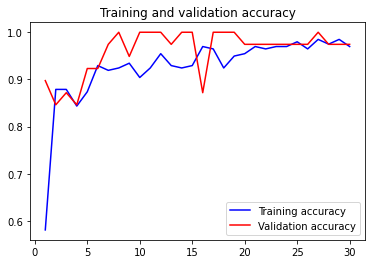

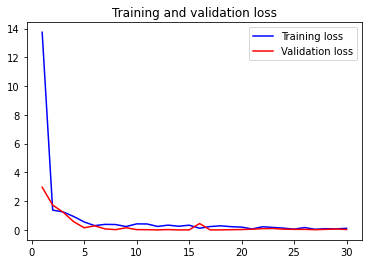

In [18]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##Checking New Images

In [20]:
from google.colab import files
myfile=files.upload()

Saving aa.jpeg to aa.jpeg
Saving aa2.jpeg to aa2.jpeg
Saving pp2.jpeg to pp2.jpeg
Saving pp.jpeg to pp.jpeg


In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
img3_path="/content/pp.jpeg"
img = image.load_img(img3_path, target_size=(180, 180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)

1/1 [==============================] - 0s 15ms/step


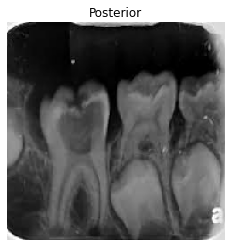

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
if pred<0.5:
    plt.title('Anterior')
else:
    plt.title('Posterior')

1/1 [==============================] - 0s 19ms/step


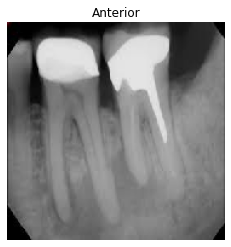

In [32]:
#one error in classification >>>>:

import numpy as np
from tensorflow.keras.preprocessing import image
img3_path="/content/pp2.jpeg"
img = image.load_img(img3_path, target_size=(180, 180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
if pred<0.5:
    plt.title('Anterior')
else:
    plt.title('Posterior')

In [27]:
model.save('Final project')

In [ ]:
These Model Classifies Anterior tooth from posterior in Periapical radiographic images. It uses VGG16 as a pretraiend model. I collected the dataset from google images and i categorized it..